# SRM INSTITUTE OF SCIENCE AND TECHNOLOGY

### 20PAIC53J- MACHINE LEARNING AND SUPERVISED CLASSIFICATION


## CT2 Project Group 11
## Bharath K M 
## ArunKumar V B 


Read the “data” dataset to perform the following

In [161]:
# importing library

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import roc_curve

### 1. Data Understanding (5 marks)

a. Read the dataset (tab, csv, xls, txt, inbuilt dataset). What do you understand from the dataset? (1 MARK)


In [11]:
df_data = pd.read_csv("C:\\Users\\Bharath Krishna\\Downloads\\data.csv")

In [12]:
df_data.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


The given dataset is related to Breast Cancer patients. features are computed from a digitized image of a fine needle aspirate (FNA) of a breast 
mass. They describe characteristics of the cell nuclei present in the image.

Below are the features that are computed for each cell 

Radius, Texture, Perimeter, Smoothness, Area, Compactness, Concavity, Concave points, Symmetry.

b. Calculate five-point summary for numerical variables (1 MARK)

In [15]:
pd.options.display.max_columns = df_data.shape[1]
df_data.drop("id",axis=1).describe().transpose().sort_index()

,count,mean,std,min,25%,50%,75%,max
area_mean,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
area_se,569.0,40.337079,45.491006,6.802000,17.850000,24.530000,45.190000,542.20000
area_worst,569.0,880.583128,569.356993,185.200000,515.300000,686.500000,1084.000000,4254.00000
compactness_mean,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
compactness_se,569.0,0.025478,0.017908,0.002252,0.013080,0.020450,0.032450,0.13540
compactness_worst,569.0,0.254265,0.157336,0.027290,0.147200,0.211900,0.339100,1.05800
concave points_mean,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
concave points_se,569.0,0.011796,0.006170,0.000000,0.007638,0.010930,0.014710,0.05279
concave points_worst,569.0,0.114606,0.065732,0.000000,0.064930,0.099930,0.161400,0.29100
concavity_mean,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680


c. Summarize observations for categorical variables – no. of categories, % observations in each category. (1 mark)


In [29]:
df_data_diag = pd.concat([pd.DataFrame(df_data.diagnosis.value_counts()), pd.DataFrame(df_data.diagnosis.value_counts(normalize=True)*100)], axis=1)
df_data_diag = df_data_diag.reset_index()
df_data_diag.columns = ["Class", "Number of class", "Percentage of Class"]
df_data_diag

,Class,Number of class,Percentage of Class
0,B,357,62.741652
1,M,212,37.258348


<AxesSubplot:>

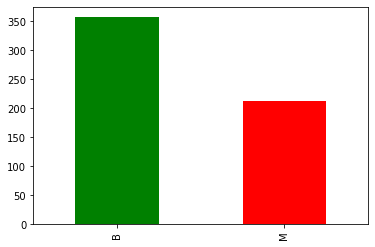

In [32]:
(df_data['diagnosis'].value_counts()).plot(kind='bar',color=['green','red'])

In [ ]:
350 of the Breast Cancer data has Benign(Not Dangerous) cells and 200 has Malignant(Cancerous) cells

d. Check for defects in the data such as missing values, null, outliers, etc and also check for class imbalance. (2 marks)


In [33]:
def MissingSummary(dataset):
    missing_percent = round(dataset.isnull().sum()*100/dataset.isnull().count(),2)
    missing_total = dataset.isnull().sum()
    
    missing_data = pd.concat([missing_total, missing_percent], keys=['Total', 'Percent'], axis = 1)
    missing_data = missing_data[missing_data.Total>0]
    
    count = 0
    for eachrow in dataset.isnull().sum(axis=1):
        if eachrow > 0:
            count = count + 1
    totalrows = len(dataset)
    
    print(round(count*100/totalrows, 2), "% (", count, "/", totalrows, ")rows has missing data in ome column", sep = "")
    
    return missing_data

missing_data = MissingSummary(df_data)
print(missing_data)

3.16% (18/569)rows has missing data in ome column
             Total  Percent
radius_mean      7     1.23
radius_se       11     1.93


In [34]:
# Loop to find the number of zero's in each column 

for eachtime  in df_data.columns:
    if len(df_data[df_data[eachtime]==0]) > 0:
        print(f"{eachtime} has {len(df_data[df_data[eachtime]==0])} records with zero value")

concavity_mean has 13 records with zero value
concave points_mean has 13 records with zero value
concavity_se has 13 records with zero value
concave points_se has 13 records with zero value
concavity_worst has 13 records with zero value
concave points_worst has 13 records with zero value


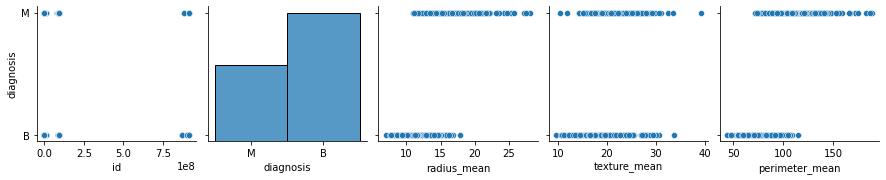

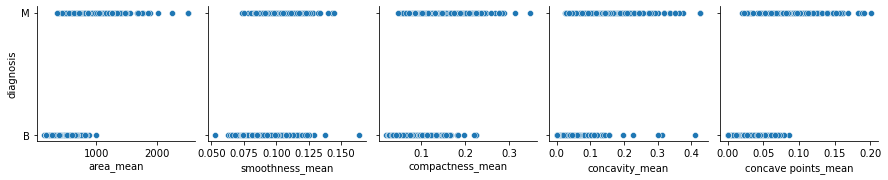

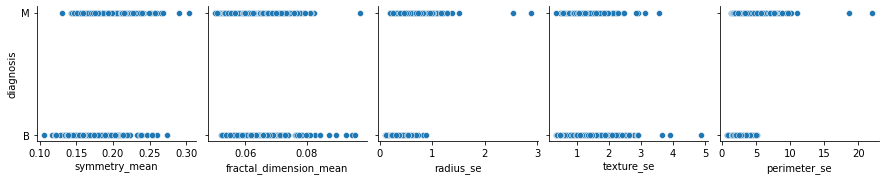

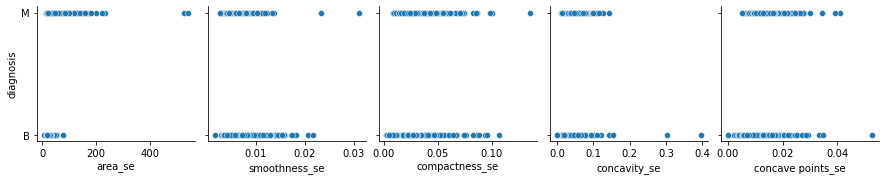

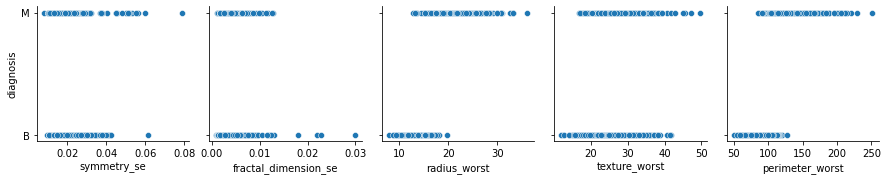

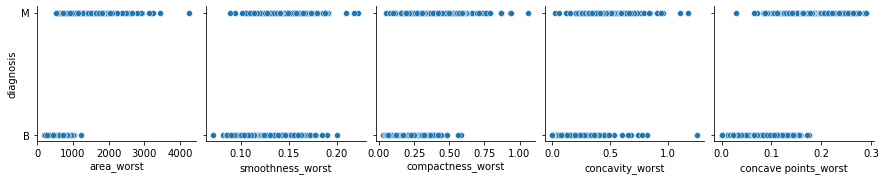

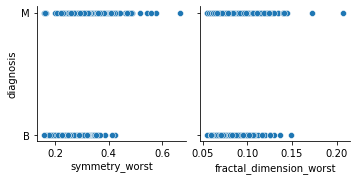

In [58]:
# Outliers Visualization

for i in range(0, len(df_data.columns), 5):
    sns.pairplot(data=df_data, x_vars=df_data.columns[i:i+5], y_vars=['diagnosis'])

###  2.  Data Preparation (15 marks)


a. Fix the defects if any and do appropriate treatment if any. (4 marks)

In [59]:
#missing value Treatment 


missing_data = MissingSummary(df_data)
print(missing_data)

3.16% (18/569)rows has missing data in ome column
             Total  Percent
radius_mean      7     1.23
radius_se       11     1.93


In [61]:
df_data["radius_mean"].fillna(np.sqrt(df_data[df_data["radius_mean"].isnull()==True]["area_mean"]/(np.pi)), inplace= True)
df_data["radius_se"].fillna(np.sqrt(df_data[df_data["radius_mean"].isnull()==True]["area_mean"]/(np.pi)), inplace= True)

In [65]:
df_data["concavity_mean"] = df_data["concavity_mean"].replace({0:np.nan})
df_data["concave points_mean"] = df_data["concave points_mean"].replace({0:np.nan})
df_data["concave points_se"] = df_data["concave points_se"].replace({0:np.nan})
df_data["concavity_worst"] = df_data["concavity_worst"].replace({0:np.nan})
df_data["concavity_se"] = df_data["concavity_se"].replace({0:np.nan})
df_data["concave points_worst"] = df_data["concave points_worst"].replace({0:np.nan})

In [73]:
df_data["concavity_mean"] = df_data["concavity_mean"].fillna(df_data.groupby("diagnosis")["concavity_mean"].transform('mean'))
df_data["concave points_mean"] = df_data["concave points_mean"].fillna(df_data.groupby("diagnosis")["concave points_mean"].transform('mean'))
df_data["concave points_se"] = df_data["concave points_se"].fillna(df_data.groupby("diagnosis")["concave points_se"].transform('mean'))
df_data["concavity_worst"] = df_data["concavity_worst"].fillna(df_data.groupby("concavity_worst")["concavity_worst"].transform('mean'))
df_data["concavity_se"] = df_data["concavity_se"].fillna(df_data.groupby("diagnosis")["concavity_se"].transform('mean'))
df_data["concave points_worst"] = df_data["concave points_worst"].fillna(df_data.groupby("diagnosis")["concave points_worst"].transform('mean'))

b. Visualize the data using relevant plots and explain the idea behind your choice of plot. Find out the variables which are highly correlated with Target? (4 marks)

<AxesSubplot:>

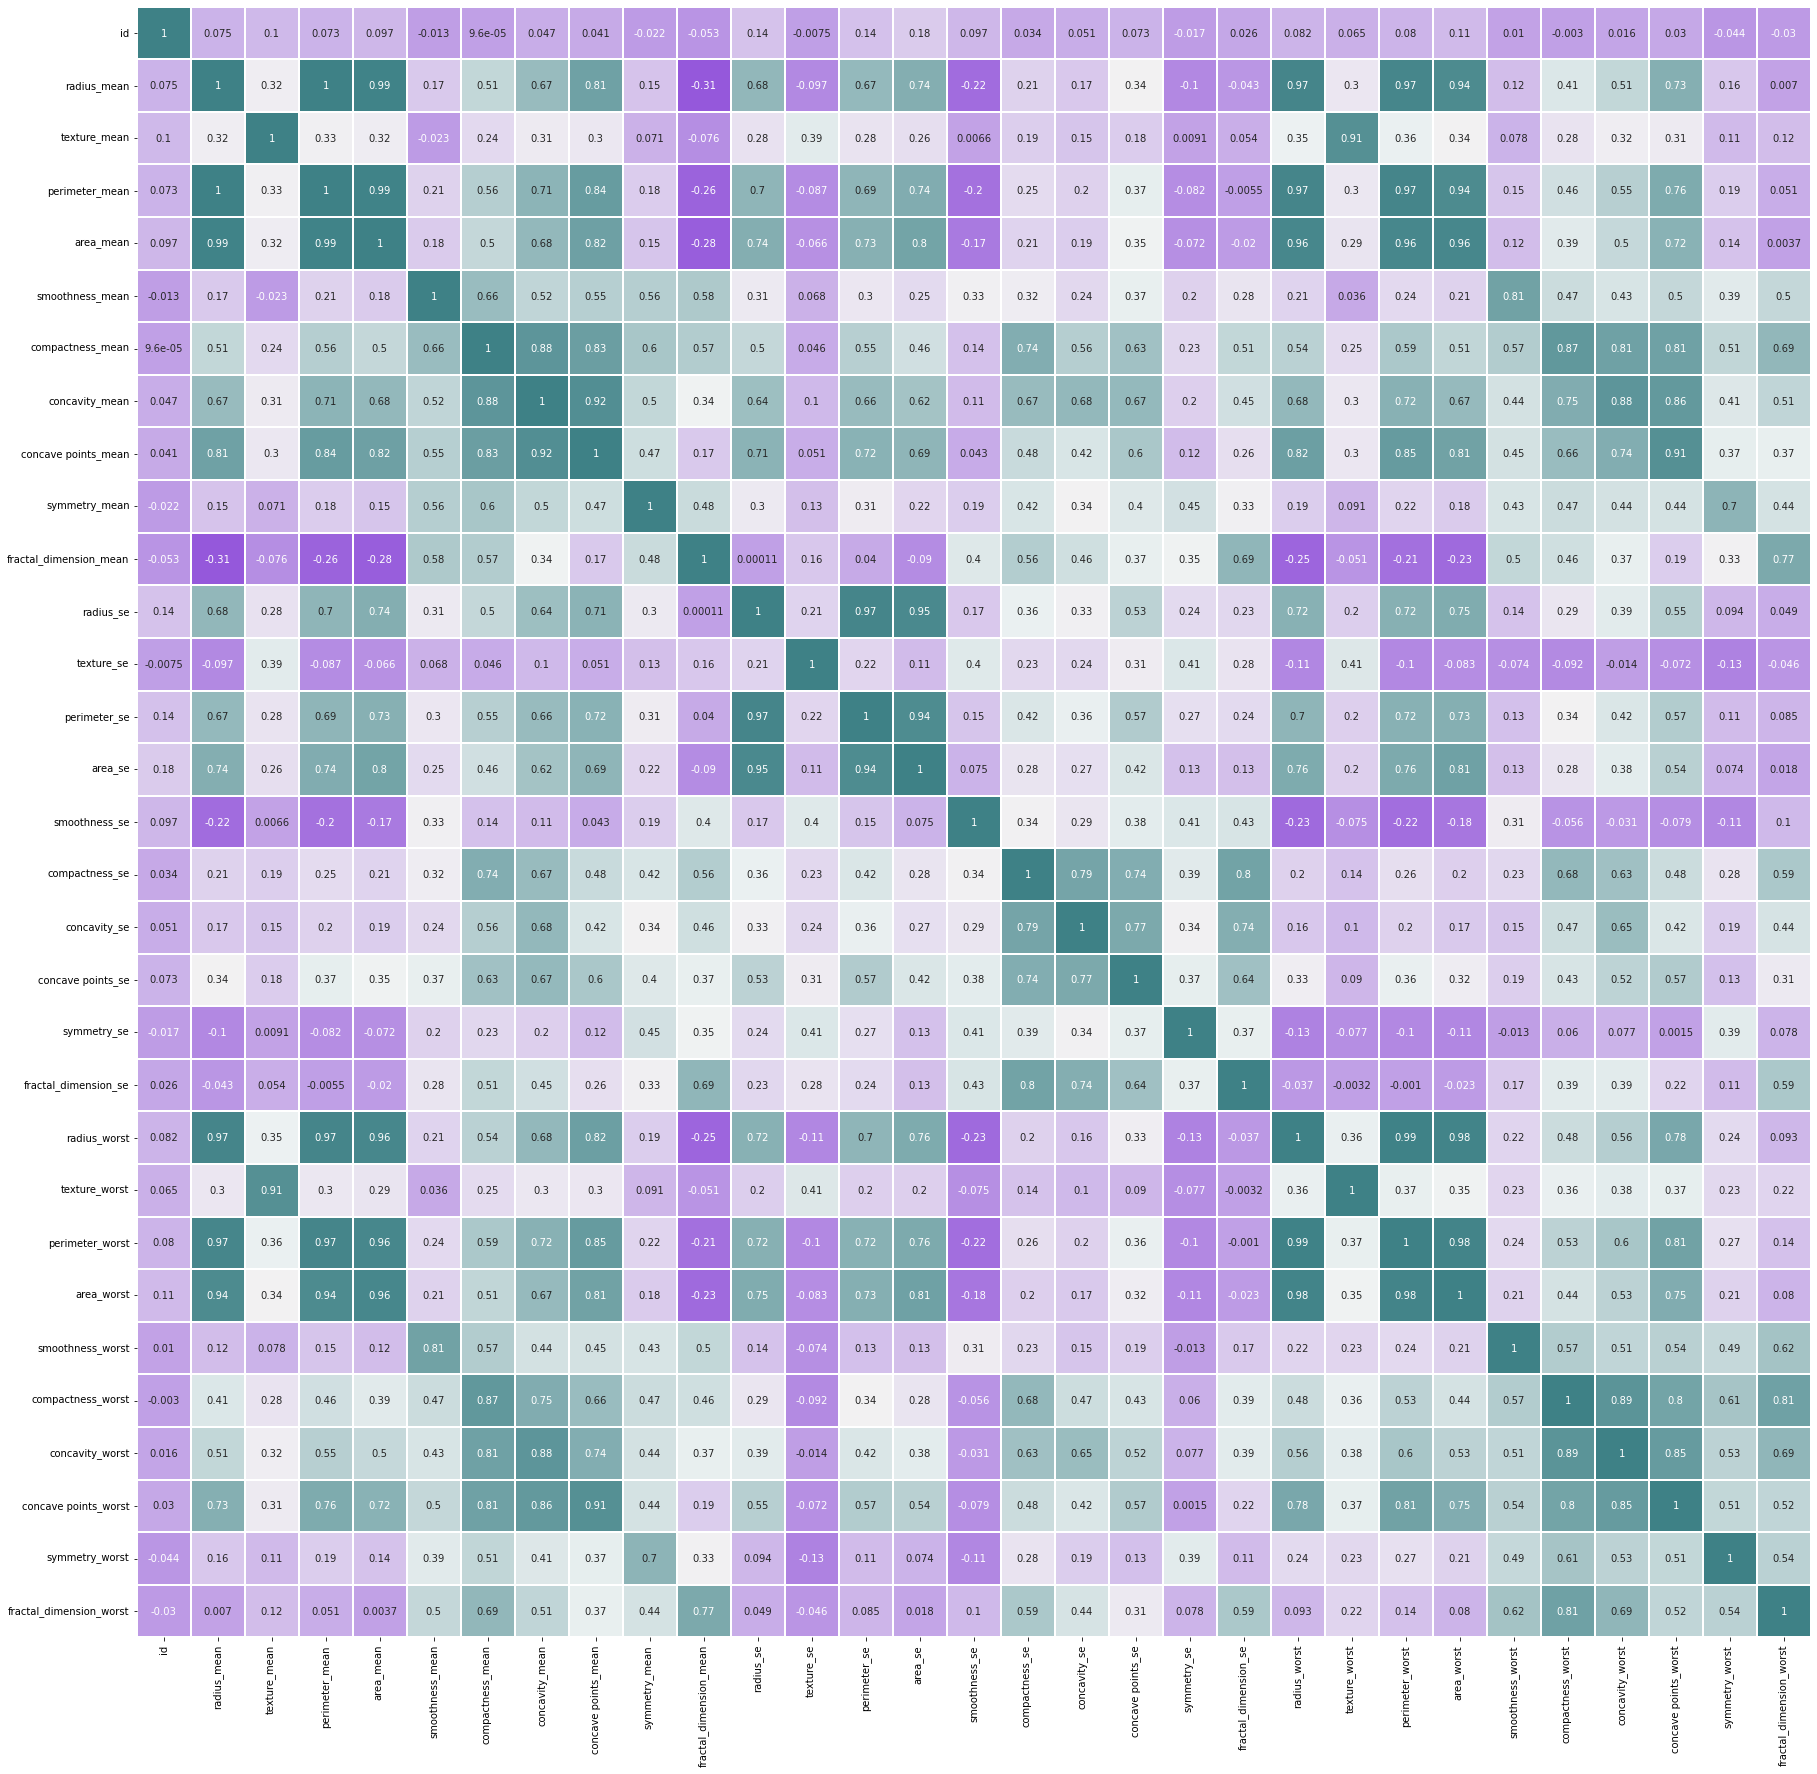

In [74]:
plt.figure(figsize=[30,30])
cmap = sns.diverging_palette(1000,200, as_cmap=True)
sns.heatmap(df_data.corr(), linewidths=0.1, annot=True, cmap=cmap, cbar=False)

Perimeter mean, radius mean, and area mean has the highly correlated(corr=1). Hence, we choose one of them. We consider perimeter mean, concavity mean, Compactness mean, and Concave points mean have high correlation with diagnosis. So, we choose all of them.

Perimeter worst, radius worst and area worst have similar correlation with other parameters. So, we select Perimeter worst


Concave points worst, concavity worst and compactness worst has better correlation with diagnosis. So, we choose all of them

Radius_se, perimeter_se and area_se. Based on correlation, we choose radius_se. 

Based on the feature importance (backward feature elimination method), low correlation vs diagnosis and model re-evaluation, we have not considered the 
below parameters. 
 "texture_mean","smoothness_mean","symmetry_mean","fractal_dimension_mean","texture_se","concavity_se","concavepoints_se","texture_worst", 
"smoothness_worst","concave points_worst","symmetry worst", "fractal_dimension_worst","smoothness_se","compactness_se","symmetry_se" and 
"fractal_dimension_se

c. Do you want to exclude some variables from the model based on this analysis? What other actions will you take before moving ahead with model creation? Tell us the reason behind your choice of action.(4 marks)

In [75]:
df_data.id.nunique()
df_data.drop("id", axis=1, inplace=True)


In [76]:
le = LabelEncoder()
df_data.diagnosis = le.fit_transform(df_data.diagnosis)
print(df_data.diagnosis.value_counts())

0    357
1    212
Name: diagnosis, dtype: int64


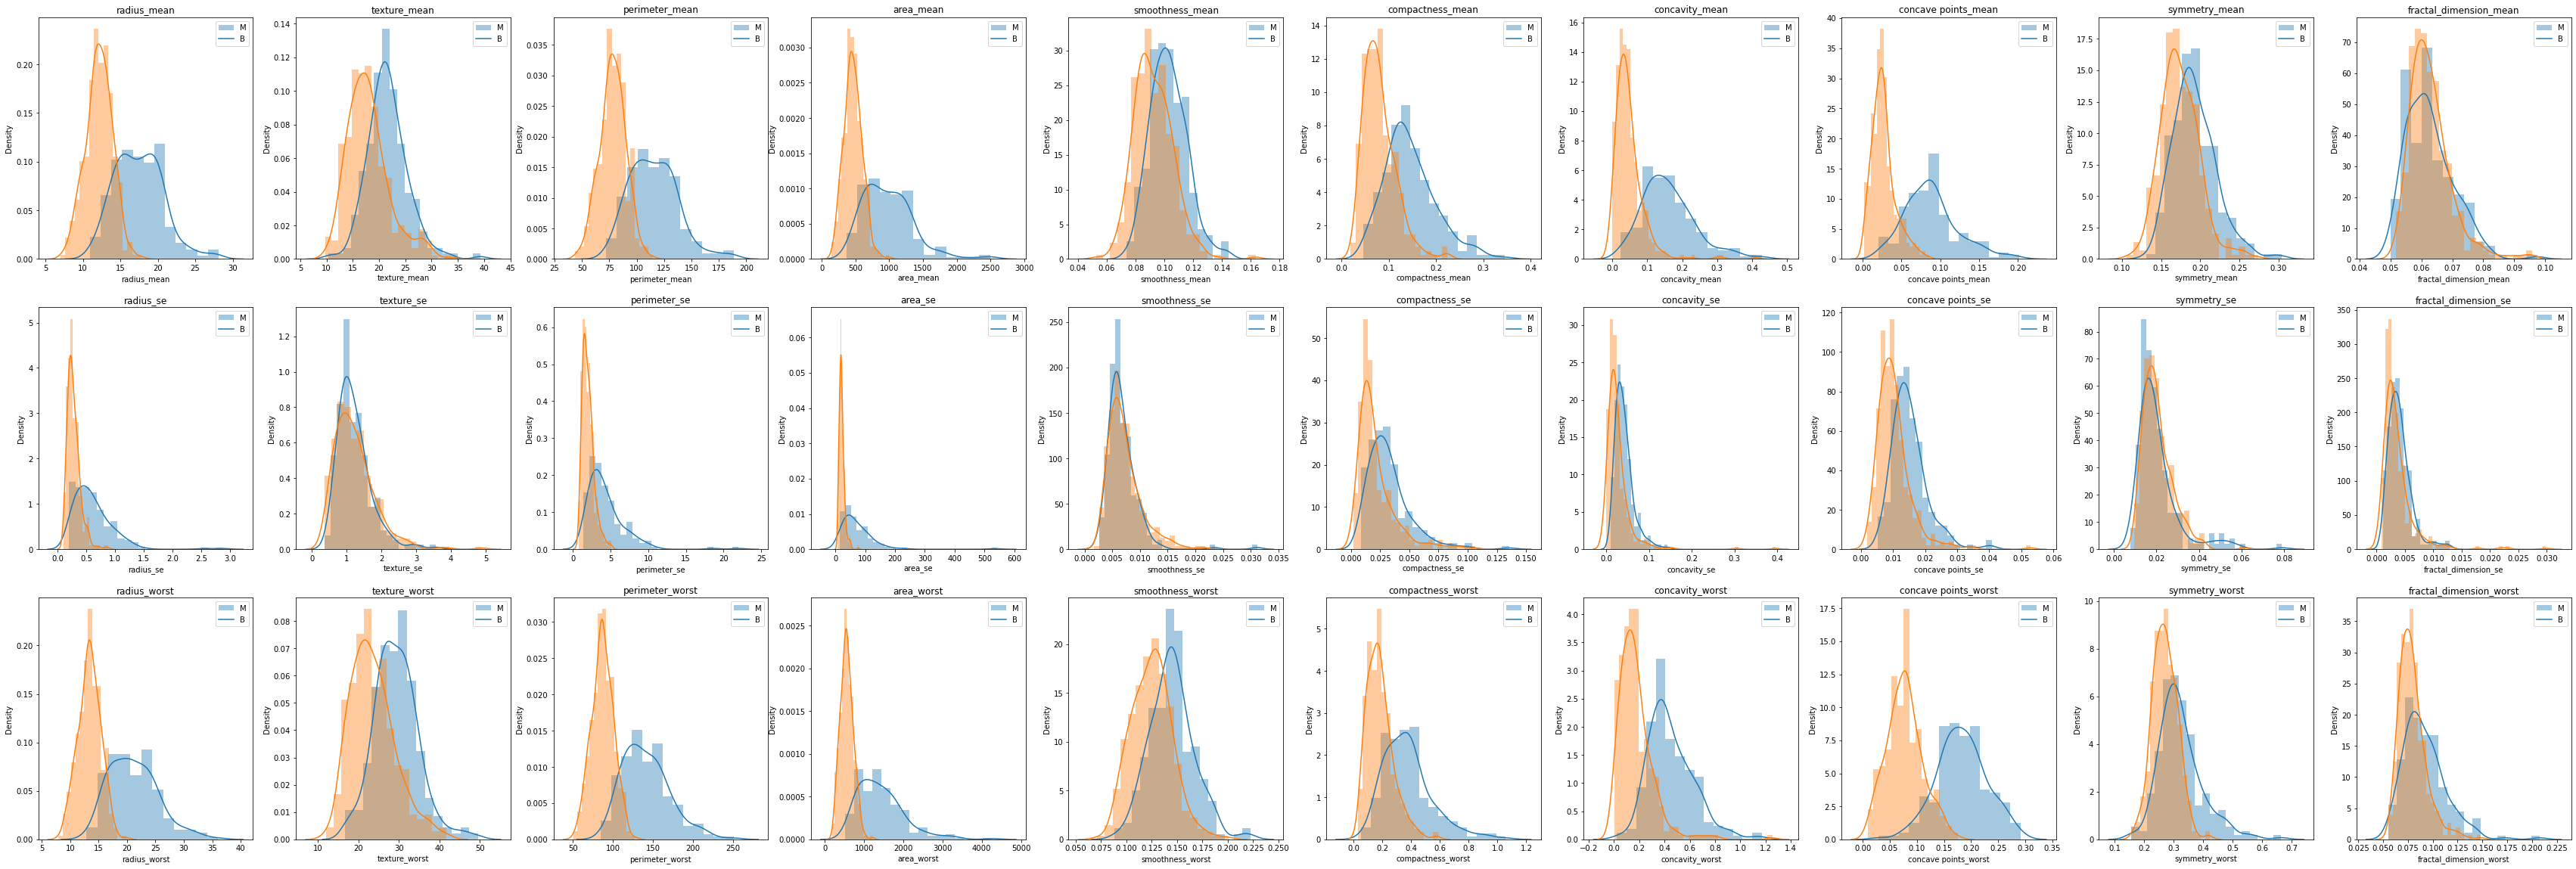

In [80]:
from warnings import filterwarnings
filterwarnings('ignore')


num_col = df_data.drop("diagnosis", axis=True).select_dtypes(include=np.number).columns
fig, axs = plt.subplots(3, 10, figsize = (60,20))
M = df_data[(df_data['diagnosis'] !=0)]
B = df_data[(df_data['diagnosis'] ==0)]

for i in range(0,3):
    for j in range(0, 10):
        curr_value = i * 10 + j
        if (len(num_col)> curr_value):
            sns.distplot(M[num_col[curr_value]], ax = axs[i,j], label="M")
            sns.distplot(B[num_col[curr_value]], ax = axs[i,j], label="B")
            axs[i, j].legend(labels = ["M", "B"])
            axs[i, j].set_title(num_col[curr_value])
        
plt.show()


d. Split dataset into train and test (70:30). Are both train and test representative of the overall data? How would you ascertain this statistically? (3 marks)

In [139]:
independent_feature =['perimeter_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'perimeter_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'radius_se']                       
dependent_feature = "diagnosis"
df_feature = df_data[independent_feature]
df_target = df_data[dependent_feature]
X = df_feature
Y = df_target                       

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=10, test_size=0.3)
X_train = X_train.fillna(X_train.mean())
Y_train = Y_train.fillna(Y_train.mean())
X_test = X_test.fillna(X_test.mean())
Y_test = Y_test.fillna(Y_test.mean())

print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('Y_train', Y_train.shape)
print('Y_test', Y_test.shape)

X_train (398, 9)
X_test (171, 9)
Y_train (398,)
Y_test (171,)


### 3. Model Building (20 marks)

a. Build a decision tree model using the gini criterion. And obtain the number of correctly predicted wheat seeds in the test set (4 marks)


In [141]:
decision_tree_classification = DecisionTreeClassifier(criterion='gini', random_state= 10)

In [142]:
decision_tree = decision_tree_classification.fit(X_train, Y_train)

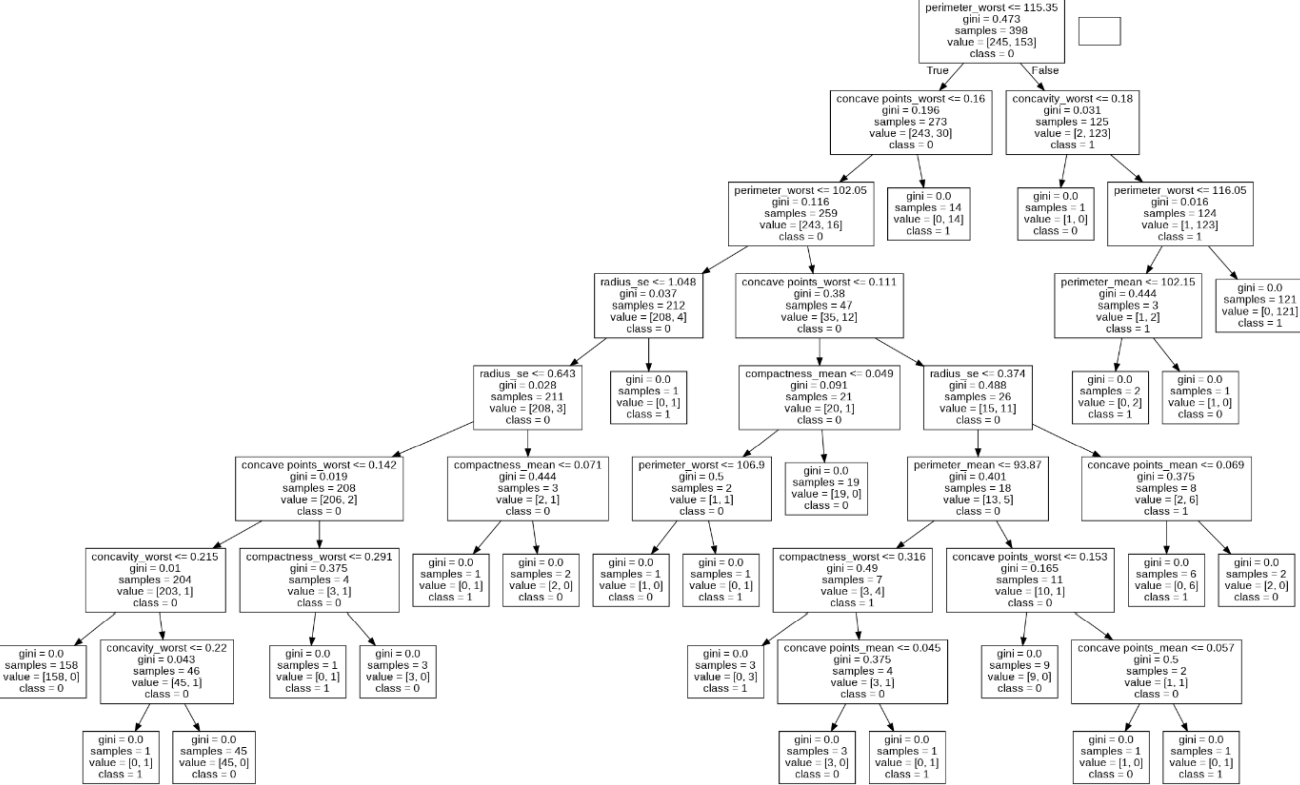

In [143]:
feat = pd.DataFrame({'feature':X_train.columns, 'feat_imp':decision_tree.feature_importances_})
feat.sort_values('feat_imp', ascending = False)

,feature,feat_imp
4,perimeter_worst,0.727180
7,concave points_worst,0.166900
3,concave points_mean,0.029198
8,radius_se,0.026673
0,perimeter_mean,0.017566
5,compactness_worst,0.015042
6,concavity_worst,0.010363
1,compactness_mean,0.007078
2,concavity_mean,0.000000


 b. What is the overall Accuracy? Please comment on it (3 mark)

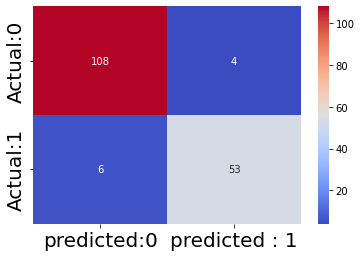

In [151]:
#Decisiontree Model

prediction_test = decision_tree.predict(X_test)
cm = confusion_matrix(Y_test, prediction_test)
conf_matrix = pd.DataFrame(data = cm, columns=['predicted:0', 'predicted : 1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [154]:
#Logistic Regrssion Model 
logistic_regression_classif = LogisticRegression()
logreg = logistic_regression_classif.fit(X_train, Y_train)

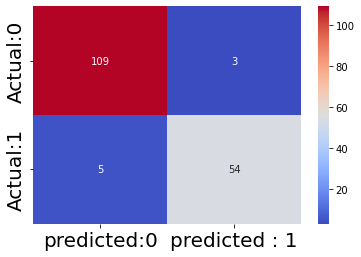

In [155]:
prediction_test = logreg.predict(X_test)
cm = confusion_matrix(Y_test, prediction_test)
conf_matrix = pd.DataFrame(data = cm, columns=['predicted:0', 'predicted : 1'], index=['Actual:0', 'Actual:1'])
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="coolwarm")
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

c. Evaluate the model built using Precision, Recall and F1 Score and interpret the results with inferences (4 marks)


In [156]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       112
           1       0.95      0.92      0.93        59

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



Precision=0.95(95%) Model has the precision of 95% which is significantly good

Recall/Sensitivity=0.93(93%) Model has the sensitivity of 93% which is significantly good

Specificity=108/(108+4) =0.96(96%) Model has the specificity of 90% which is significantly good

F1-Score=0.93(93%) Model has the F1-Score of 93% which is significantly good

Accuracy=0.95( 95%) Model has the accuracy of 95% which is significantly good


d. Build a logistic regression model and compare the performance of the same with decision tree. What are your inferences?

In [158]:
X_train_const = sm.add_constant(X_train)
X_test_const = sm.add_constant(X_test)
logreg= sm.Logit(Y_train, X_train_const).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.106883
         Iterations 11
                           Logit Regression Results                           
Dep. Variable:              diagnosis   No. Observations:                  398
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            9
Date:                Tue, 25 Oct 2022   Pseudo R-squ.:                  0.8396
Time:                        23:07:43   Log-Likelihood:                -42.540
converged:                       True   LL-Null:                       -265.14
Covariance Type:            nonrobust   LLR p-value:                 3.036e-90
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -15.9312      3.506     -4.544      0.000     -22.803      -9.06

In [159]:
Y_pred_prob = logreg.predict(X_test_const)

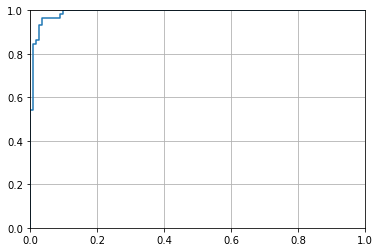

In [163]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred_prob)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0,1.0])
plt.grid(True)
